# QUBO formulation of the Redundant Calibration

In [180]:
import numpy as np
np.random.seed(20)

In [181]:
A = np.array(
[[ 1.000e+00, -3.779e+03,  0.000e+00, -1.000e+00],
 [-1.000e+00,  0.000e+00, -8.447e+01,  0.000e+00],
 [ 0.000e+00, -1.000e+00,  0.000e+00,  0.000e+00],
 [ 0.000e+00,  1.000e+00, -1.000e+00,  0.000e+00]])



In [182]:
b = np.array([-1.484e+01, -2.198e-01,  6.029e-03, -1.099e-04])


## Classical Solution

The solution of such a small system can be obtained by a least square as implemented in numpy

In [183]:
npsol = np.linalg.solve(A,b)
npsol = np.asarray(npsol).flatten()
print(npsol)

[ 7.19786377e-01 -6.02900000e-03 -5.91910000e-03  3.83433774e+01]


In [184]:
np.linalg.lstsq(A,b)

/tmp/ipykernel_5136/3473248641.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A,b)


(array([ 7.19786377e-01, -6.02900000e-03, -5.91910000e-03,  3.83433774e+01]),
 array([], dtype=float64),
 4,
 array([3.77900053e+03, 8.44818368e+01, 1.21073581e-02, 2.58708269e-04]))

## 3. Solving the system

We will use here the `SimulatedAnnealingSampler` to be able to run that code locally. Quantum solvers are available through the Leap cloud service.

In [169]:
from qubols.qubols import QUBOLS
from qubols.encodings import RangedEfficientEncoding
import dimod
import neal

exact = dimod.ExactSolver()
sim = neal.SimulatedAnnealingSampler()

options = {'num_reads':100, 'num_qbits':21, 'sampler': sim, 
           'encoding': RangedEfficientEncoding, 'range':10.0, 'offset':[0,0,0,0]}
qubols= QUBOLS(options)
sol_num = qubols.solve(At, bt)

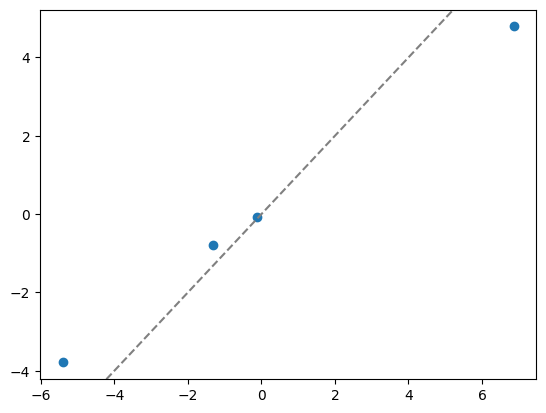

In [170]:
import matplotlib.pyplot as plt
plt.scatter(npsol, sol_num)
plt.axline( (0,0),slope=1,linestyle='--',color='gray')

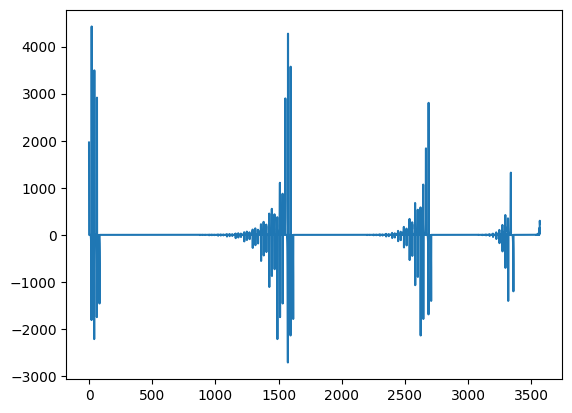

In [171]:
v = np.array([float(v) for k, v in qubols.qubo_dict.items()])
plt.plot(v)
# plt.plot(np.log(np.abs(v)))

In [172]:
from qubols.aequbols import AEQUBOLS

In [173]:
options = {'num_reads':20, 'iterations':3, 'num_qbits':11, 
           'encoding': RangedEfficientEncoding, 'range':10.0, 'offset':0.0,
           'sampler':sim,}
qubols= AEQUBOLS(options)
sol_num = qubols.solve(A, b)

0 [0.0, 0.0, 0.0, 0.0] 10.0
1 [6.744868035190616, -0.3225806451612909, -5.122189638318671, -1.212121212121212] [4.60614760571363, 2.543023669107624, 3.1844072859762114, 0.7399610798447811]
2 [6.311591454684937, 0.03273392306121607, -5.125558947594292, -1.2121624509710331] [2.173086560046077, 0.8298320986264245, 1.7165181345741218, 0.3688863269518917]


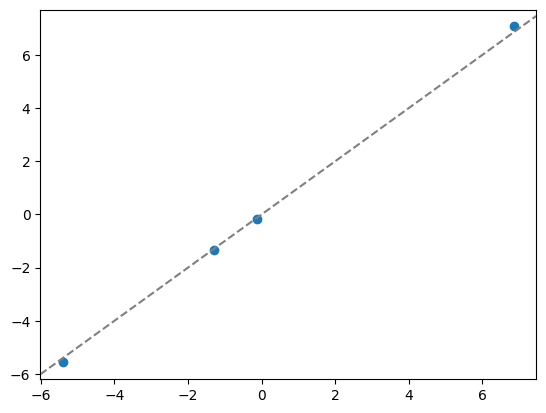

In [174]:
import matplotlib.pyplot as plt
plt.scatter(npsol, sol_num)
plt.axline( (0,0),slope=1,linestyle='--',color='gray')

In [62]:
print(npsol)
print(sol_num)

[-1.35356 -0.49    -0.49     0.15959]
[-1.33116289 -0.49250987 -0.49637943  0.18553796]
